# Laptop Price Prediction - Regression

In this project, we have a dataset containing laptop prices. We will perform data analysis and feature engineering on this data to create a regression model. This model will be used to predict laptop prices.

<img src='https://img.tamindir.com/2023/12/253503/en-iyi-laptop-modelleri-4.jpg' >

### Import Dataset and Useful Libraries

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('laptop_data.csv',index_col=0)

### EDA and Feature Engineering

In [3]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [5]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [7]:
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [8]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

There are too many data in this column. We will simplfy to understand it.

In [9]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df[['Resolution_Width', 'Resolution_Height']] = df['ScreenResolution'].str.split('x', expand=True)
df.Resolution_Width = df.Resolution_Width.astype('int64')
df.Resolution_Height = df.Resolution_Height.astype('int64')

In [10]:
df['PPI'] = (((df['Resolution_Width']**2) + (df['Resolution_Height']**2))**0.5/df['Inches']).astype('float')

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600,226.983005


Let's check the Cpu column.

In [12]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N3710 1.6GHz      11
AMD A9-Series 9420 3GHz                   11
Intel Core i5 6300U 2.4GHz                11
Intel Celeron Dual Core N3050 1.6GHz      11
Intel 

We know that Cpu frequency and type are important so wi will mine this datas from the Cpu column.

In [13]:
df['Cpu_Frequency'] = df['Cpu'].str.extract(r'(\d+\.\d+|\d+)(?=\s*GHz)').astype(float)

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI,Cpu_Frequency
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600,226.983005,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900,127.677940,1.8
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080,141.211998,2.5
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800,220.534624,2.7
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600,226.983005,3.1


In [15]:
df['Cpu_Manufacturer'] = df['Cpu'].apply(lambda x:'Intel' if 'Intel' in x else 'AMD' if 'AMD' in x else 'Samsung' if 'Samsung' in x else 'Other')

In [16]:
df['Cpu_Manufacturer'].value_counts()

Cpu_Manufacturer
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [17]:
def Cpu_Type(Cpu):
    if 'Intel Core i3' in Cpu:
        return 'Intel Core i3'
    elif 'Intel Core i5' in Cpu:
        return 'Intel Core i5'
    elif 'Intel Core i7' in Cpu:
        return 'Intel Core i7'
    elif 'AMD' in Cpu:
        return 'AMD'
    elif 'Samsung' in Cpu:
        return 'Samsung'
    else:
        return 'Other Intel'

df['Cpu_Type'] = df['Cpu'].apply(Cpu_Type)

In [18]:
df=df.drop('Cpu',axis=1)

In [19]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI,Cpu_Frequency,Cpu_Manufacturer,Cpu_Type
17,Apple,Ultrabook,15.4,2880x1800,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,152274.24,0,1,2880,1800,220.534624,2.9,Intel,Intel Core i7
482,HP,Notebook,13.3,1920x1080,4GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.49kg,38681.28,0,1,1920,1080,165.632118,1.6,Intel,Intel Core i5
372,Asus,Gaming,17.3,1920x1080,16GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.25kg,117162.72,0,1,1920,1080,127.335675,3.0,AMD,AMD
1248,Lenovo,Notebook,15.6,1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,2.3kg,30529.44,0,1,1920,1080,141.211998,2.5,Intel,Intel Core i5
497,HP,Notebook,14.0,1920x1080,8GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.48kg,93186.72,0,0,1920,1080,157.350512,2.8,Intel,Intel Core i7


In [20]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

We will drop the GB's so data will be a numeric value

In [21]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)

In [22]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

Memory column is complicated to understand and create a model. It has to be seperated SSD and HDD.

In [23]:
df['SSD'] = df['Memory'].str.extract(r'(\d+TB SSD|\d+GB SSD|\d+GB Flash Storage)')
df['HDD'] = df['Memory'].str.extract(r'(\d+TB HDD|\d+GB HDD)')
df['Hybrid'] = df['Memory'].str.extract(r'(\d+TB Hybrid|\d+GB Hybrid)')

In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI,Cpu_Frequency,Cpu_Manufacturer,Cpu_Type,SSD,HDD,Hybrid
77,Dell,Notebook,15.6,1920x1080,8,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02kg,45554.40,0,0,1920,1080,141.211998,1.8,Intel,Intel Core i7,128GB SSD,1TB HDD,NaN
938,Dell,Ultrabook,14.0,1920x1080,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,87325.92,0,0,1920,1080,157.350512,2.5,Intel,Intel Core i5,256GB SSD,NaN,NaN
566,Dell,Notebook,15.6,1366x768,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.93kg,51095.52,0,0,1366,768,100.454670,2.6,Intel,Intel Core i5,NaN,500GB HDD,NaN
1192,HP,Notebook,15.6,1366x768,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.86kg,25840.80,0,0,1366,768,100.454670,2.5,Intel,Intel Core i5,NaN,500GB HDD,NaN
82,HP,Notebook,14.0,1920x1080,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.63kg,45820.80,0,0,1920,1080,157.350512,1.6,Intel,Intel Core i5,256GB SSD,NaN,NaN


In [25]:
df['SSD'] = df['SSD'].str.replace('GB SSD', '').str.replace('TB SSD', '').str.replace('GB Flash Storage', '')
df['HDD'] = df['HDD'].str.replace('GB HDD', '').str.replace('TB HDD', '')
df['Hybrid'] = df['Hybrid'].str.replace('GB Hybrid', '').str.replace('TB Hybrid', '')

In [26]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI,Cpu_Frequency,Cpu_Manufacturer,Cpu_Type,SSD,HDD,Hybrid
1125,Lenovo,2 in 1 Convertible,14.0,1920x1080,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,88924.32,1,1,1920,1080,157.350512,2.5,Intel,Intel Core i7,256,NaN,NaN


In [27]:
df['SSD'] = df.apply(lambda x: float(x['SSD']) * 1024 if 'TB SSD' in x['Memory'] or 'TB Flash Storage' in x['Memory'] else float(x['SSD']) if pd.notna(x['SSD']) else 0, axis=1)
df['HDD'] = df.apply(lambda x: float(x['HDD']) * 1024 if 'TB HDD' in x['Memory'] else float(x['HDD']) if pd.notna(x['HDD']) else 0, axis=1)
df['Hybrid'] = df.apply(lambda x: float(x['Hybrid']) * 1024 if 'TB Hybrid' in x['Memory'] else float(x['Hybrid']) if pd.notna(x['Hybrid']) else 0, axis=1)

In [28]:
df['SSD'] = df['SSD'].fillna(0)
df['HDD'] = df['HDD'].fillna(0)
df['Hybrid'] = df['Hybrid'].fillna(0)

In [29]:
df=df.drop('Memory',axis=1)

In [30]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI,Cpu_Frequency,Cpu_Manufacturer,Cpu_Type,SSD,HDD,Hybrid
438,Lenovo,Ultrabook,14.0,2560x1440,24,Intel HD Graphics 620,Windows 10,1.32kg,126912.96,0,0,2560,1440,209.800683,2.7,Intel,Intel Core i7,512.0,0.0,0.0
1007,HP,Ultrabook,14.0,1920x1080,8,Intel HD Graphics 520,Windows 7,1.43kg,77202.72,0,0,1920,1080,157.350512,2.6,Intel,Intel Core i7,256.0,0.0,0.0
549,Lenovo,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,Windows 10,1.99kg,92121.12,0,1,1920,1080,141.211998,2.7,Intel,Intel Core i7,512.0,0.0,0.0
1128,Lenovo,Gaming,15.6,1920x1080,8,Nvidia GeForce GTX 1060,No OS,2.4kg,52693.92,0,1,1920,1080,141.211998,2.5,Intel,Intel Core i5,128.0,1024.0,0.0
657,Dell,Notebook,15.6,1920x1080,16,AMD Radeon 530,Windows 10,2.2kg,60472.80,0,0,1920,1080,141.211998,1.8,Intel,Intel Core i7,256.0,2048.0,0.0


In [31]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620             281
Intel HD Graphics 520             185
Intel UHD Graphics 620             68
Nvidia GeForce GTX 1050            66
Nvidia GeForce GTX 1060            48
Nvidia GeForce 940MX               43
AMD Radeon 530                     41
Intel HD Graphics 500              39
Intel HD Graphics 400              37
Nvidia GeForce GTX 1070            30
Intel HD Graphics                  29
Nvidia GeForce GTX 1050 Ti         28
AMD Radeon R5 M430                 22
Nvidia GeForce 930MX               20
AMD Radeon 520                     17
Nvidia GeForce MX150               15
Intel HD Graphics 515              15
Intel HD Graphics 615              14
AMD Radeon R7 M445                 14
Nvidia GeForce GTX 960M            14
Nvidia GeForce 920MX               13
Intel HD Graphics 505              12
AMD Radeon R5                      11
Nvidia GeForce GTX 980M            10
Intel HD Graphics 405               9
Nvidia Quadro M1200                 9
AMD Rade

Let's check the GPU manufacturers.

In [32]:
def Gpu_Manufacturer(Gpu):
    if 'Intel' in Gpu:
        return 'Intel'
    elif 'AMD' in Gpu:
        return 'AMD'
    elif 'Nvidia' in Gpu:
        return 'Nvidia'
    else:
        return 'Other'

df['Gpu_Manufacturer'] = df['Gpu'].apply(Gpu_Manufacturer)

In [33]:
df=df.drop('Gpu',axis=1)

In [34]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI,Cpu_Frequency,Cpu_Manufacturer,Cpu_Type,SSD,HDD,Hybrid,Gpu_Manufacturer
157,Asus,2 in 1 Convertible,13.3,1920x1080,8,Windows 10,1.1kg,70063.2000,1,0,1920,1080,165.632118,1.6,Intel,Intel Core i5,256.0,0.0,0.0,Intel
1294,HP,Notebook,15.6,1920x1080,6,Windows 10,2.04kg,29303.4672,0,0,1920,1080,141.211998,2.9,AMD,AMD,0.0,0.0,0.0,AMD
1195,HP,Notebook,15.6,1920x1080,12,Windows 10,2.21kg,70702.5600,0,1,1920,1080,141.211998,2.8,Intel,Intel Core i7,128.0,1024.0,0.0,Nvidia
29,HP,Notebook,17.3,1920x1080,8,Windows 10,2.5kg,47738.8800,0,0,1920,1080,127.335675,1.6,Intel,Intel Core i5,0.0,1024.0,0.0,Nvidia
131,Dell,Notebook,15.6,1920x1080,4,Windows 10,2.2kg,23922.7200,0,0,1920,1080,141.211998,2.0,Intel,Intel Core i3,0.0,1024.0,0.0,AMD


In [35]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: xlabel='OpSys', ylabel='Price'>

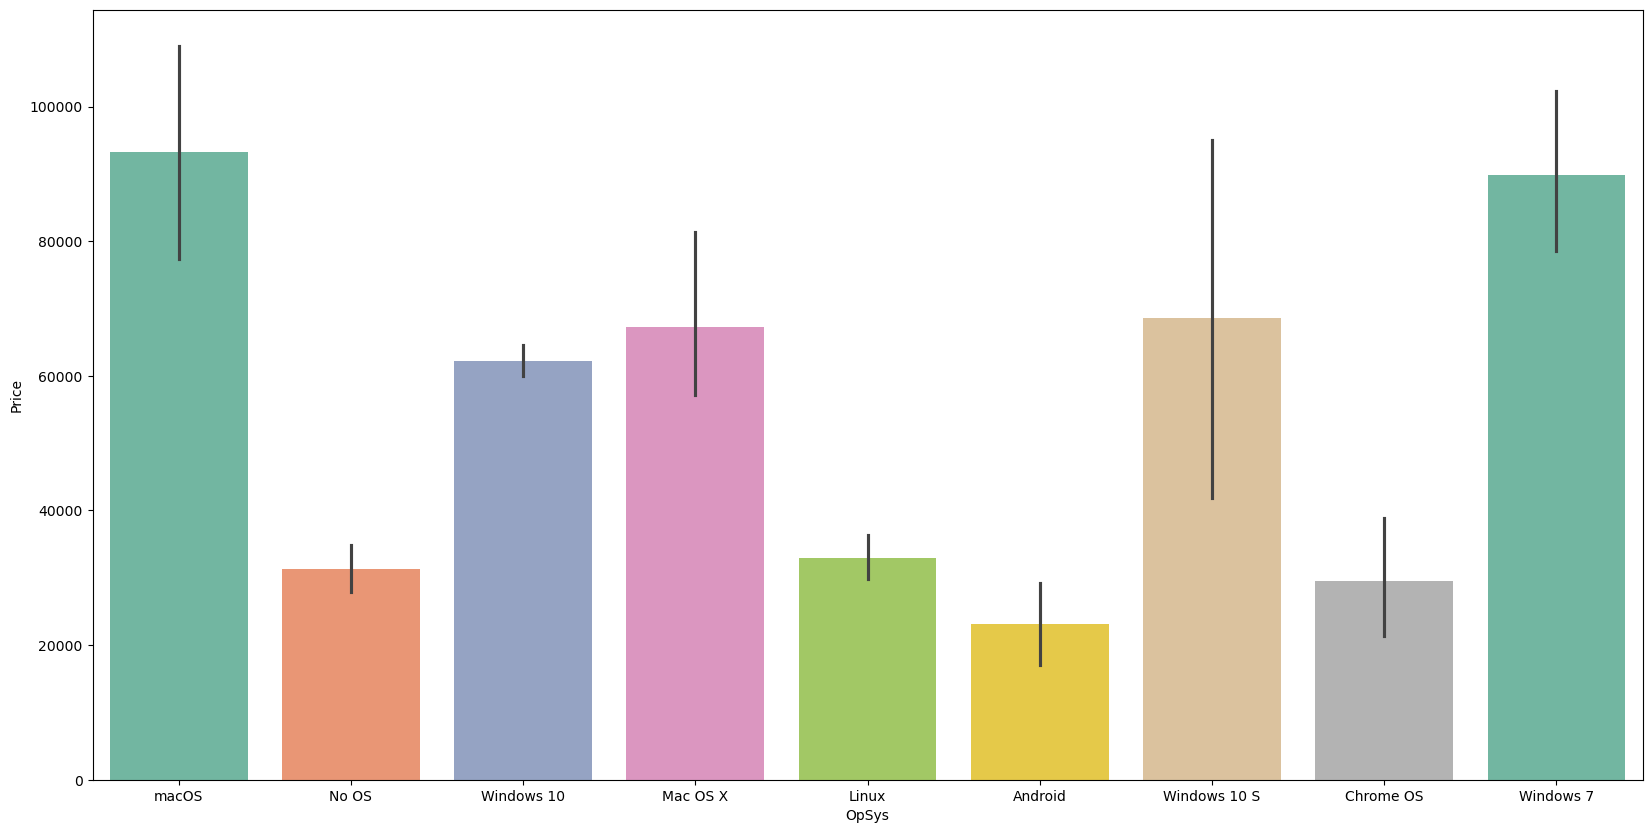

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x='OpSys',y='Price', data=df,palette='Set2')

We will not change anything about OpSys

In [37]:
df['Weight'].value_counts()

Weight
2.2kg      121
2.1kg       58
2.4kg       44
2.3kg       41
2.5kg       38
2kg         35
2.8kg       28
1.2kg       26
1.86kg      25
1.4kg       24
2.04kg      24
2.18kg      23
1.5kg       21
1.9kg       21
1.6kg       20
1.7kg       18
1.95kg      18
1.3kg       17
1.8kg       17
1.1kg       16
1.26kg      15
1.91kg      14
3kg         14
1.36kg      14
1.37kg      13
2.62kg      12
2.7kg       12
1.25kg      12
2.6kg       12
4.42kg      11
1.29kg      11
1.63kg      11
2.06kg      10
2.23kg      10
1.48kg      10
1.84kg      10
2.0kg       10
1.49kg      10
2.65kg       9
2.9kg        9
1.44kg       9
1.64kg       9
2.31kg       8
1.54kg       8
2.36kg       8
1.45kg       7
1.42kg       7
3.2kg        7
1.65kg       7
2.02kg       7
1.05kg       7
1.23kg       7
1.32kg       7
1.34kg       6
1.75kg       6
1.88kg       6
1.62kg       6
2.25kg       6
2.19kg       6
1.28kg       6
1.43kg       6
1.13kg       5
2.32kg       5
1.16kg       5
1.93kg       5
1.47kg       5
3.7

We will drop the 'kg', so our data will be numeric.

In [38]:
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [39]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI,Cpu_Frequency,Cpu_Manufacturer,Cpu_Type,SSD,HDD,Hybrid,Gpu_Manufacturer
1012,HP,Notebook,14.0,1920x1080,4,Windows 10,1.48,84715.2,0,0,1920,1080,157.350512,2.5,Intel,Intel Core i5,256.0,0.0,0.0,Intel


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   ScreenResolution   1303 non-null   object 
 4   Ram                1303 non-null   int32  
 5   OpSys              1303 non-null   object 
 6   Weight             1303 non-null   float64
 7   Price              1303 non-null   float64
 8   Touchscreen        1303 non-null   int64  
 9   IPS                1303 non-null   int64  
 10  Resolution_Width   1303 non-null   int64  
 11  Resolution_Height  1303 non-null   int64  
 12  PPI                1303 non-null   float64
 13  Cpu_Frequency      1303 non-null   float64
 14  Cpu_Manufacturer   1303 non-null   object 
 15  Cpu_Type           1303 non-null   object 
 16  SSD                1303 non-n

In [41]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price,Touchscreen,IPS,Resolution_Width,Resolution_Height,PPI,Cpu_Frequency,SSD,HDD,Hybrid
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404,-0.414804,0.307870,-0.147167,0.529268,-0.019772
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437,0.303763,0.368000,0.601556,0.099918,-0.023894
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846,-0.323240,0.320434,-0.091751,0.514014,-0.014112
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809,0.473487,0.430293,0.676787,-0.093112,-0.004826
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930,0.460587,-0.082579,0.253705,-0.208454,-0.011521
IPS,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030,0.300879,0.063035,0.240458,-0.091762,-0.017288
Resolution_Width,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219,0.931217,0.183548,0.536656,-0.123255,-0.029638
Resolution_Height,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000,0.939363,0.169668,0.533136,-0.134914,-0.029509
PPI,-0.414804,0.303763,-0.323240,0.473487,0.460587,0.300879,0.931217,0.939363,1.000000,0.043541,0.530832,-0.293131,-0.022310
Cpu_Frequency,0.307870,0.368000,0.320434,0.430293,-0.082579,0.063035,0.183548,0.169668,0.043541,1.000000,0.227208,0.130129,0.000067


<Axes: >

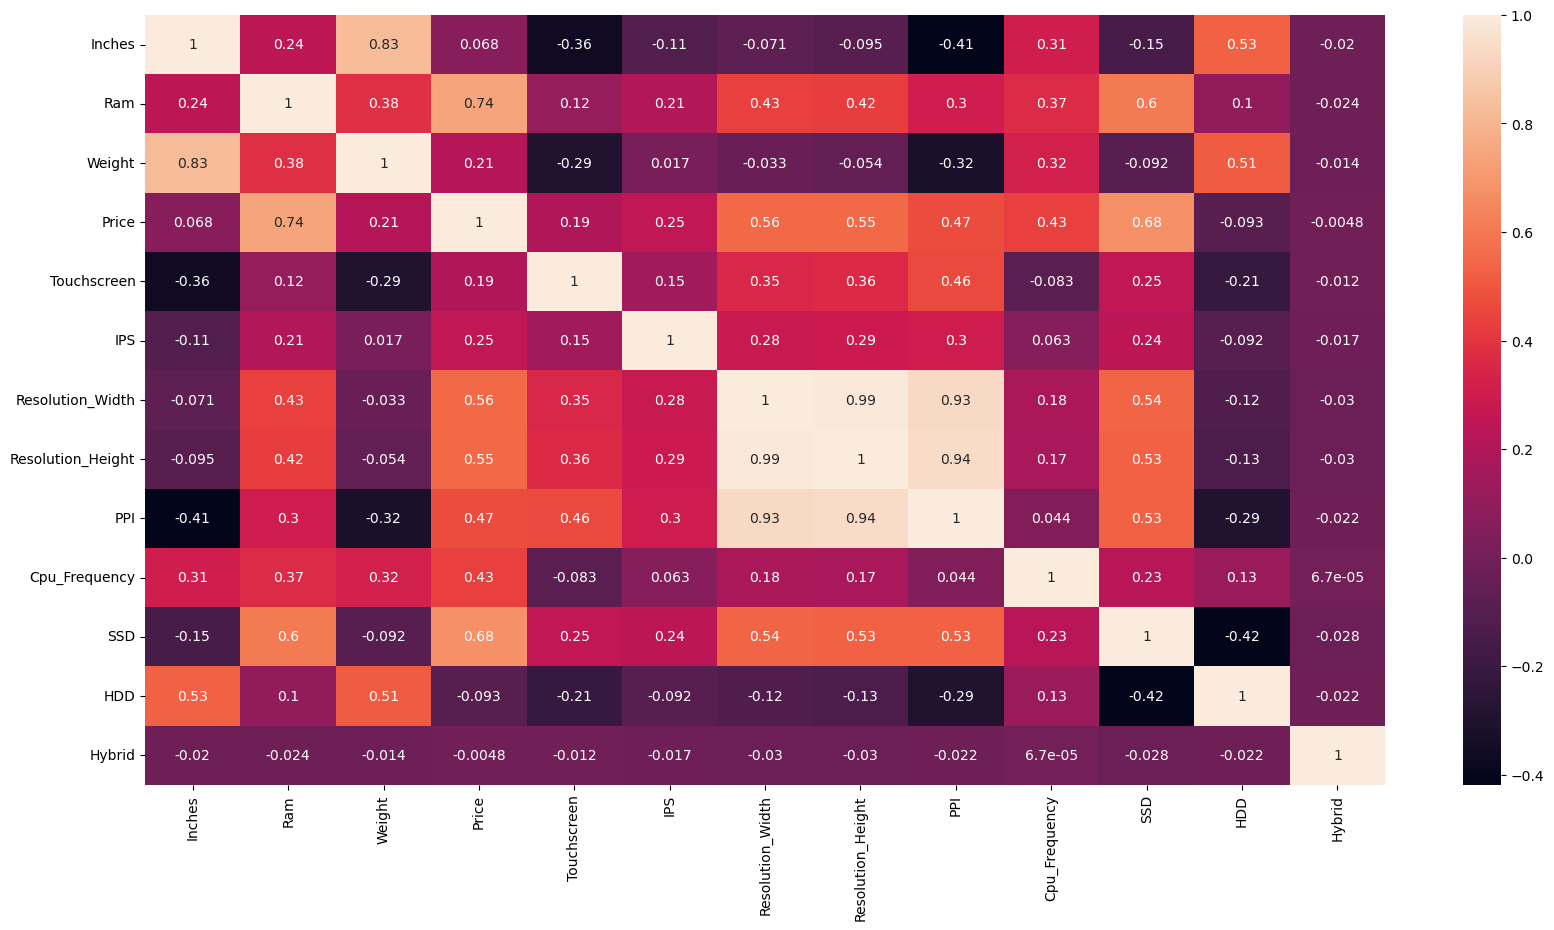

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Regression

To train our model, we will convert the data in the object datatype to numeric data.

In [43]:
df=pd.get_dummies(df,drop_first=True)

Let's determine our x and y values

In [44]:
x=df.drop('Price',axis=1)
y=df['Price']

We will use algo test algorithm and apply various regression library to the data and we will find which library give us the best score.

In [45]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #I define all models
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #I create a dataframe to tabulate the error and accuracy rates
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #I place my accuracy and error rates in the table named result
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #sorts and returns the result table I created according to the accuracy rate (r2_score)
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [46]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.472710e-01,1.483971e+04,9.441350e+03
XGBRegressor,8.264056e-01,1.582095e+04,9.193920e+03
Lasso,7.857081e-01,1.757792e+04,1.226266e+04
Linear,7.856540e-01,1.758014e+04,1.227690e+04
Ridge,7.832874e-01,1.767692e+04,1.220450e+04
ElasticNet,7.144741e-01,2.029025e+04,1.432971e+04
Decision Tree,6.791700e-01,2.150810e+04,1.281991e+04
KNeighborsRegressor,6.555871e-01,2.228457e+04,1.840327e+04
Extra Tree,6.317647e-01,2.304238e+04,1.276376e+04
AdaBoost,5.702698e-01,2.489216e+04,1.502338e+04


We find that Gradient Boosting	give us the best score.

In [48]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [49]:
GBR=GradientBoostingRegressor()

In [50]:
GBR_model=GBR.fit(x_train,y_train)

In [51]:
y_pred=GBR_model.predict(x_test)

In [52]:
r2_score(y_test,y_pred)

0.8477415617516915

<Axes: ylabel='Price'>

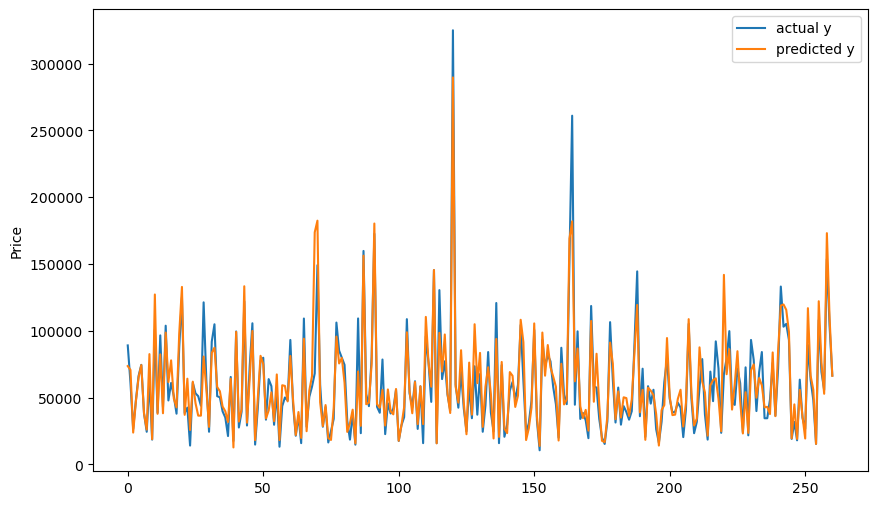

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)),y=y_test, label="actual y")
sns.lineplot(x=range(len(y_test)),y=y_pred, label="predicted y")

### Feature Importance

Now we will see which column has the greatest impact on the price.

In [54]:
GBR.feature_importances_

array([1.87807491e-02, 3.76821064e-01, 7.82229784e-02, 2.53431147e-03,
       2.59963122e-03, 1.38181868e-02, 2.40775044e-03, 2.93201944e-02,
       5.22786427e-02, 1.84008243e-01, 4.96206843e-03, 0.00000000e+00,
       0.00000000e+00, 1.36679013e-03, 0.00000000e+00, 1.14680168e-03,
       0.00000000e+00, 0.00000000e+00, 1.98863363e-03, 0.00000000e+00,
       1.30172017e-03, 3.61837838e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.37464264e-02, 0.00000000e+00, 7.66440414e-04,
       1.66356513e-04, 3.02484872e-04, 7.48930234e-03, 0.00000000e+00,
       7.71388251e-02, 1.03344152e-03, 2.45439004e-02, 0.00000000e+00,
       0.00000000e+00, 5.98003193e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01719095e-03,
       0.00000000e+00, 0.00000000e+00, 1.30566474e-04, 2.06524270e-03,
       1.17285830e-03, 0.00000000e+00, 8.39187058e-04, 0.00000000e+00,
       3.51913104e-03, 2.49682113e-03, 0.00000000e+00, 1.68801659e-02,
      

In [55]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':GBR.feature_importances_})

In [60]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

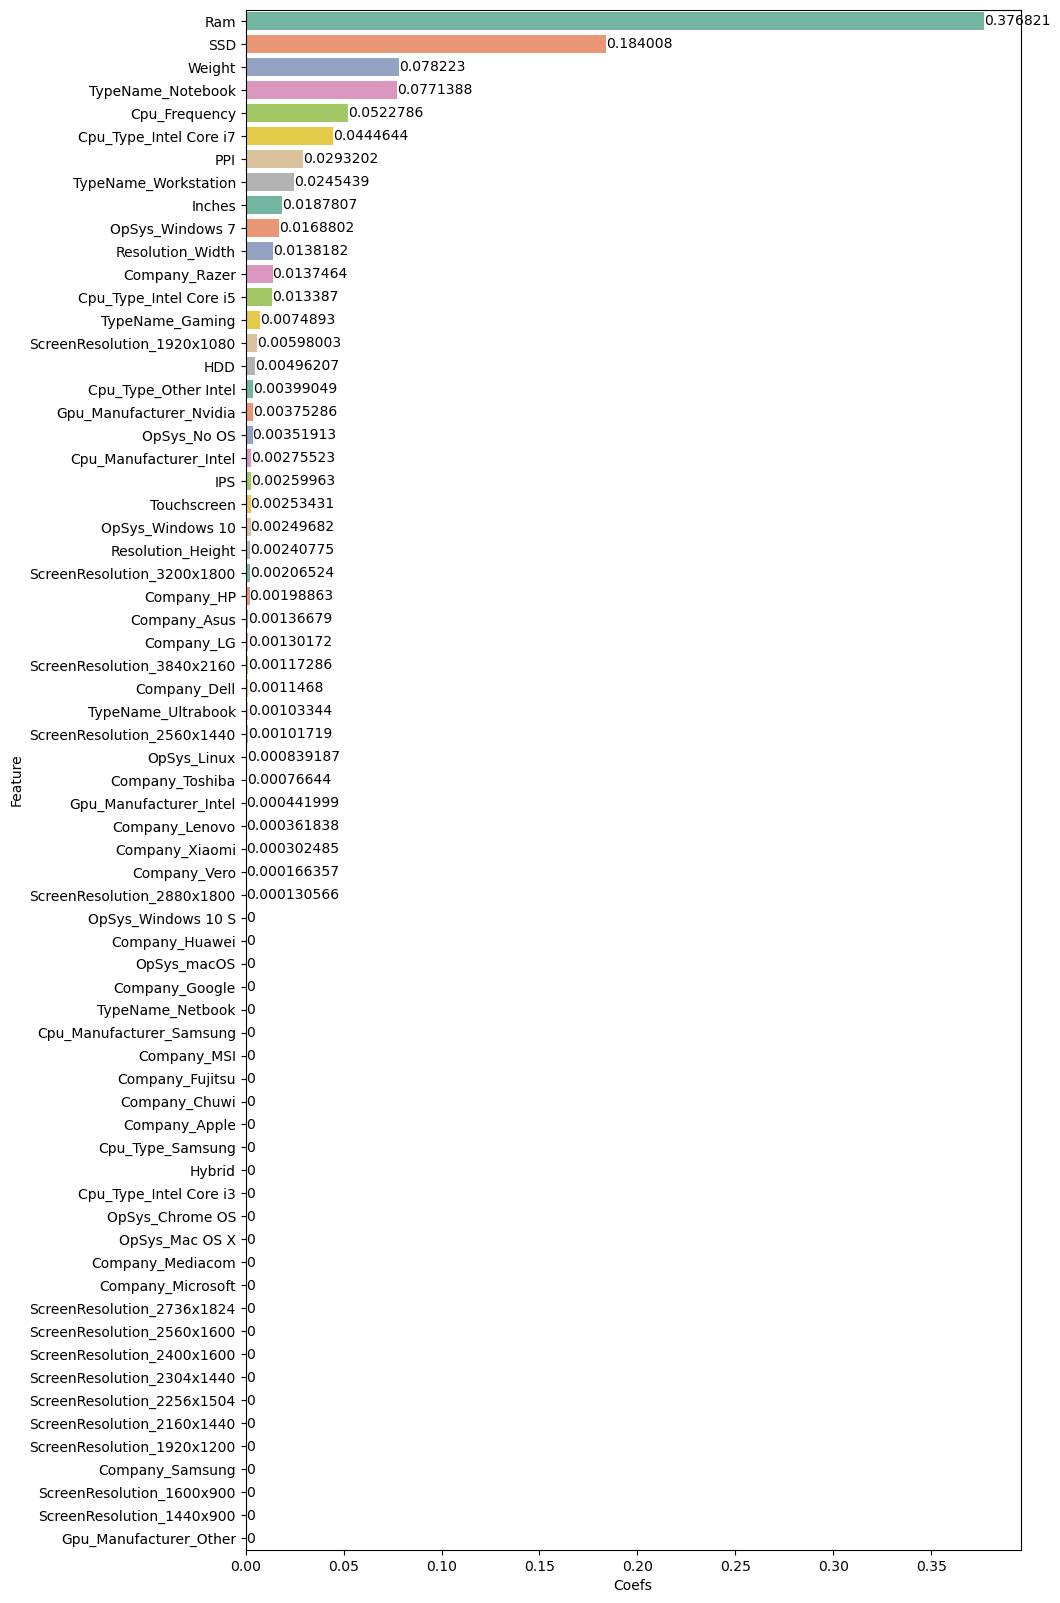

In [63]:
plt.figure(figsize=(10, 20))
ax = sns.barplot(y='Feature', x='Coefs', data=feature_importance, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

### Conclusion

We read our dataset containing laptop specifications and prices using the pandas library. Each column in our dataset contained various but highly important data for determining the laptop's price. We then performed feature engineering using the pandas library to extract these features. We then split our data into 80% training and 20% testing. We used 14 different regression libraries to create 14 different regression models. The most successful model was created using Gradient Boosting, achieving an 85% R2 Score. 

We determined the feature importance, which supported the results from our correlation analysis. We found that the features that most affect a laptop's price are RAM, SSD capacity, weight and CPU frequency. Now, when we receive data for a new laptop, we can predict its price using our model.